In [38]:
%run 02_backtesting_environment.ipynb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_set, test_set = get_training_and_test_data("2012-01-01",2000, portfolio = config.MAX_SHARPE, window_size = 50, min_weight = 0.1,rf_rate = 0.02, freq = "D")

/var/folders/yt/34c9vnwj57bd8vnfcz5mt6sr0000gn/T/ipykernel_45324/272753090.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  indicators = indicators.fillna(method='ffill')
/var/folders/yt/34c9vnwj57bd8vnfcz5mt6sr0000gn/T/ipykernel_45324/272753090.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  indicators = indicators.fillna(method='ffill')
/var/folders/yt/34c9vnwj57bd8vnfcz5mt6sr0000gn/T/ipykernel_45324/338444868.py:82: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_returns = df_prices_window.pct_change().dropna()
/var/folders/yt/34c9vnwj57bd8vnfcz5mt6sr0000gn/T/ipykernel_45324/338444868.py:82: Fu

In [31]:
train_set

,CONSSENT_Consumer_Confidence,PIDSDPS_SAVINGS_DISP_INC,USYC2Y10_10y_2y,CPI_YOY_US_CPI,CSI_BARC_HY_SPREAD,GDP_CURY_US_GDP_GROWTH,S&P500_PE_PE_Ratio_S&P,LB1_Lumber,CL1_OIL_WTI,GLDHG_COPPER_GOLD_RATIO,USURTOT_US_UNEMPLOYMENT,LUATTRUU_Fixed_Income,RMZ_REITs,SPX_Equities,XAU_Gold,cash
2012-01-20,0.178161,0.421875,0.545644,0.888889,0.573506,0.423077,0.151780,0.128671,0.856855,0.315508,0.97619,0.1,0.6,0.1,0.1,0.1
2012-01-21,0.178161,0.421875,0.545644,0.888889,0.573506,0.423077,0.151780,0.128671,0.856855,0.315508,0.97619,0.1,0.6,0.1,0.1,0.1
2012-01-22,0.178161,0.421875,0.545644,0.888889,0.573506,0.423077,0.151780,0.128671,0.856855,0.315508,0.97619,0.1,0.6,0.1,0.1,0.1
2012-01-23,0.178161,0.421875,0.562769,0.888889,0.557351,0.423077,0.152564,0.132942,0.870138,0.307105,0.97619,0.1,0.6,0.1,0.1,0.1
2012-01-24,0.178161,0.421875,0.567364,0.888889,0.552504,0.423077,0.150870,0.101975,0.862666,0.291409,0.97619,0.1,0.6,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-19,0.959770,0.281250,0.041637,0.583333,0.176090,0.653846,0.961159,0.811532,0.213354,0.437013,0.00000,0.1,0.1,0.1,0.6,0.1
2017-06-20,0.959770,0.281250,0.031438,0.583333,0.190630,0.653846,0.944648,0.786973,0.201850,0.454927,0.00000,0.1,0.1,0.1,0.6,0.1
2017-06-21,0.959770,0.281250,0.032858,0.583333,0.206785,0.653846,0.943219,0.768286,0.193548,0.428207,0.00000,0.1,0.1,0.1,0.6,0.1
2017-06-22,0.959770,0.281250,0.028811,0.583333,0.210016,0.653846,0.942090,0.783769,0.196039,0.435500,0.00000,0.1,0.1,0.1,0.6,0.1


In [4]:
feature_cols = [
    "CONSSENT_Consumer_Confidence", "PIDSDPS_SAVINGS_DISP_INC", "USYC2Y10_10y_2y",
    "CPI_YOY_US_CPI", "CSI_BARC_HY_SPREAD", "GDP_CURY_US_GDP_GROWTH",
    "S&P500_PE_PE_Ratio_S&P", "LB1_Lumber", "CL1_OIL_WTI", "GLDHG_COPPER_GOLD_RATIO",
    "USURTOT_US_UNEMPLOYMENT"
]
target_cols = ["LUATTRUU_Fixed_Income", "RMZ_REITs", "SPX_Equities", "XAU_Gold", "cash"]

# Drop rows with missing values (if any)
df = train_set.dropna(subset=feature_cols + target_cols)

X = df[feature_cols]
y = df[target_cols]

In [ ]:
# Instantiate and fit the model
model = MultiOutputRegressor(LinearRegression())
model.fit(X, y)

# Predict (on training data or separate test data)
y_pred = model.predict(X)  # or model.predict(X_test) for test set

/Users/valentinennser/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/valentinennser/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/valentinennser/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/valentinennser/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/valentinennser/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/valentinennser/Library/Python/3.9/lib/python/site-p

In [8]:
y_pred

array([[0.1       , 0.42613757, 0.02725703, 0.3466054 , 0.1       ],
       [0.1       , 0.42613757, 0.02725703, 0.3466054 , 0.1       ],
       [0.1       , 0.42613757, 0.02725703, 0.3466054 , 0.1       ],
       ...,
       [0.1       , 0.46048508, 0.19307917, 0.14643575, 0.1       ],
       [0.1       , 0.4584972 , 0.19760271, 0.14390009, 0.1       ],
       [0.1       , 0.46079513, 0.19591669, 0.14328818, 0.1       ]])

In [20]:
weights = pd.DataFrame(y_pred, columns=target_cols, index=train_set.index)

In [21]:
weights

,LUATTRUU_Fixed_Income,RMZ_REITs,SPX_Equities,XAU_Gold,cash
2012-01-20,0.1,0.426138,0.027257,0.346605,0.1
2012-01-21,0.1,0.426138,0.027257,0.346605,0.1
2012-01-22,0.1,0.426138,0.027257,0.346605,0.1
2012-01-23,0.1,0.421031,0.030290,0.348679,0.1
2012-01-24,0.1,0.420367,0.025415,0.354218,0.1
...,...,...,...,...,...
2017-06-19,0.1,0.456631,0.199676,0.143693,0.1
2017-06-20,0.1,0.449604,0.205335,0.145061,0.1
2017-06-21,0.1,0.460485,0.193079,0.146436,0.1
2017-06-22,0.1,0.458497,0.197603,0.143900,0.1


In [33]:
weights_nn = pd.read_csv('export/train_weights.csv')
weights_nn.index = weights.index
weights_nn

,SPX_Equities,RMZ_REITs,LUATTRUU_Fixed_Income,XAU_Gold,cash
2012-01-20,0.1,0.6,0.1,0.1,0.1
2012-01-21,0.1,0.6,0.1,0.1,0.1
2012-01-22,0.1,0.6,0.1,0.1,0.1
2012-01-23,0.1,0.6,0.1,0.1,0.1
2012-01-24,0.1,0.6,0.1,0.1,0.1
...,...,...,...,...,...
2017-06-19,0.1,0.1,0.1,0.6,0.1
2017-06-20,0.1,0.1,0.1,0.6,0.1
2017-06-21,0.1,0.1,0.1,0.6,0.1
2017-06-22,0.1,0.1,0.1,0.6,0.1


/var/folders/yt/34c9vnwj57bd8vnfcz5mt6sr0000gn/T/ipykernel_45324/1408159611.py:48: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_prices = get_indices(start_date.strftime("%Y-%m-%d"), date_range[-1].strftime("%Y-%m-%d")).pct_change().dropna()


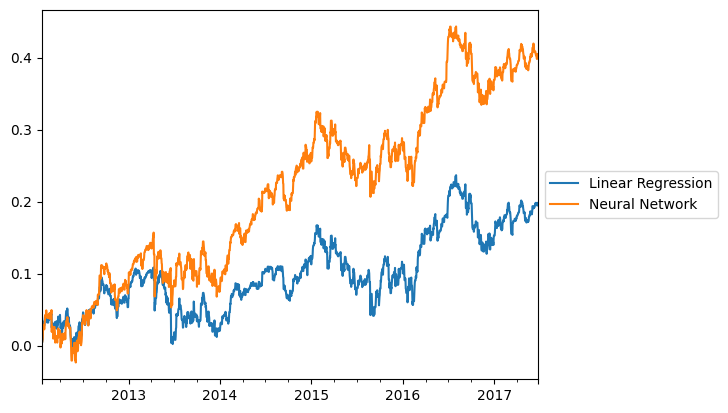

In [39]:
draw_strategies(weights, "Linear Regression", weights_nn, "Neural Network")